# Pydy Tuesday 2025-03-04
Data Source: [Long Beach Animal Shelter](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-04/readme.md)

### Data Details
The dataset comes from the [City of Long Beach Animal Care Services](https://www.longbeach.gov/acs/) via the [{animalshelter}](https://emilhvitfeldt.github.io/animalshelter/) R package.

This dataset comprises of the intake and outcome record from Long Beach Animal Shelter.

### Exploration questions
- How has the number of pet adoptions changed over the years?
- Which type of pets are adopted most often?

## Download data
We can download the data using the `PyDyTuesday` library and specifying the date. This will load several files:
- `longbeach.csv`: data file.
- `meta.yaml`: meta data file with information about the data files and and the curator.
- `lbacs-adoption-graph.png`: Barchart of annual adoption totals from 2018 to 2022.
- `LBACS-logo.png`: Long Beach Animal Care Services logo.

The data dictionary is located [here](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-04/readme.md#data-dictionary)

In [1]:
import PyDyTuesday

# Download files from the week, which you can then read in locally
PyDyTuesday.get_date('2025-03-04')

LBACS-logo.png downloaded
lbacs-adoption-graph.png downloaded
longbeach.csv downloaded
meta.yaml downloaded
readme.md downloaded


## Explore data
First, let's read in the data and have a look.

In [3]:
import pandas as pd

df = pd.read_csv("longbeach.csv")
print(df.head())

  animal_id animal_name animal_type primary_color secondary_color      sex  \
0   A693708   *charlien         dog         white             NaN   Female   
1   A708149         NaN     reptile         brown           green  Unknown   
2   A638068         NaN        bird         green             red  Unknown   
3   A639310         NaN        bird         white            gray  Unknown   
4   A618968     *morgan         cat         black           white   Female   

          dob intake_date intake_condition intake_type  ... outcome_date  \
0  2013-02-21  2023-02-20         ill mild       stray  ...   2023-02-26   
1         NaN  2023-10-03           normal       stray  ...   2023-10-03   
2         NaN  2020-01-01  injured  severe    wildlife  ...   2020-01-01   
3         NaN  2020-02-02       ill severe    wildlife  ...   2020-02-02   
4  2014-12-18  2018-12-18  injured  severe       stray  ...   2019-01-13   

                                          crossing jurisdiction outcome_ty

Now, let's use the `great_tables` library to print a snapshot of our data in a prettier format. Because the dataset has 22 columns, we'll hide some columns.

In [9]:
from great_tables import GT

(
    GT(df.head())
    .tab_header(title="Long Beach Animal Shelter", subtitle="Intake and Outcome Records")
    .fmt_date(columns=["dob","intake_date", "outcome_date"], date_style="wd_m_day_year")
    .cols_hide(columns=["animal_name","primary_color", "secondary_color", "intake_subtype", "reason_for_intake", "crossing", "jurisdiction", "latitude", "longitude", "outcome_is_dead", "was_outcome_alive", "geopoint"])
)


GT(_tbl_data=  animal_id animal_name animal_type primary_color secondary_color      sex  \
0   A693708   *charlien         dog         white             NaN   Female   
1   A708149         NaN     reptile         brown           green  Unknown   
2   A638068         NaN        bird         green             red  Unknown   
3   A639310         NaN        bird         white            gray  Unknown   
4   A618968     *morgan         cat         black           white   Female   

          dob intake_date intake_condition intake_type  ... outcome_date  \
0  2013-02-21  2023-02-20         ill mild       stray  ...   2023-02-26   
1         NaN  2023-10-03           normal       stray  ...   2023-10-03   
2         NaN  2020-01-01  injured  severe    wildlife  ...   2020-01-01   
3         NaN  2020-02-02       ill severe    wildlife  ...   2020-02-02   
4  2014-12-18  2018-12-18  injured  severe       stray  ...   2019-01-13   

                                          crossing jurisdiction outcome_type  \
0  [2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806   Long Beach   euthanasia   
1                    `600 BLK E HARCOURT, LB 90805   Long Beach       rescue   
2            0 BLK GRAND AVE, LONG BEACH, CA 90803   Long Beach   euthanasia   
3           0 BLK TEMPLE AVE, LONG BEACH, CA 90803   Long Beach     transfer   
4            0 BLK W ZANE ST, LONG BEACH, CA 90805   Long Beach       rescue   

  outcome_subtype   latitude   longitude  outcome_is_dead  was_outcome_alive  \
0      ill severe  33.804794 -118.188926             True              False   
1      other resc  33.867999 -118.200931            False               True   
2      inj severe  33.760478 -118.148091             True              False   
3            lbah  33.762460 -118.159678            False               True   
4      littlelion  33.849501 -118.194905            False               True   

                   geopoint  
0  33.8047935, -118.1889261  
1  33.8679994, -118.2009307  
2  33.7604783, -118.1480912  
3  33.7624598, -118.1596777  
4  33.8495009, -118.1949053  

[5 rows x 22 columns], _body=<great_tables._gt_data.Body object at 0x12e842970>, _boxhead=Boxhead([ColInfo(var='animal_id', type=<ColInfoTypeEnum.default: 1>, column_label='animal_id', column_align='left', column_width=None), ColInfo(var='animal_name', type=<ColInfoTypeEnum.hidden: 4>, column_label='animal_name', column_align='left', column_width=None), ColInfo(var='animal_type', type=<ColInfoTypeEnum.default: 1>, column_label='animal_type', column_align='left', column_width=None), ColInfo(var='primary_color', type=<ColInfoTypeEnum.hidden: 4>, column_label='primary_color', column_align='left', column_width=None), ColInfo(var='secondary_color', type=<ColInfoTypeEnum.hidden: 4>, column_label='secondary_color', column_align='left', column_width=None), ColInfo(var='sex', type=<ColInfoTypeEnum.default: 1>, column_label='sex', column_align='left', column_width=None), ColInfo(var='dob', type=<ColInfoTypeEnum.default: 1>, column_label='dob', column_align='right', column_width=None), ColInfo(var='intake_date', type=<ColInfoTypeEnum.default: 1>, column_label='intake_date', column_align='right', column_width=None), ColInfo(var='intake_condition', type=<ColInfoTypeEnum.default: 1>, column_label='intake_condition', column_align='left', column_width=None), ColInfo(var='intake_type', type=<ColInfoTypeEnum.default: 1>, column_label='intake_type', column_align='left', column_width=None), ColInfo(var='intake_subtype', type=<ColInfoTypeEnum.hidden: 4>, column_label='intake_subtype', column_align='left', column_width=None), ColInfo(var='reason_for_intake', type=<ColInfoTypeEnum.hidden: 4>, column_label='reason_for_intake', column_align='right', column_width=None), ColInfo(var='outcome_date', type=<ColInfoTypeEnum.default: 1>, column_label='outcome_date', column_align='right', column_width=None), ColInfo(var='crossing', type=<ColInfoTypeEnum.hidden: 4>, column_label='crossing', column_align='left', column_

## Pet Adoptions
First, let's filter our data set to include only `outcome_type = "adoption"`. We'll restrict our analysis to only those animals that whose `outcome_type` is labelled "adoption", eventhough some animals labelled "foster to adopt" may have ultimately been adopted.

Next, we'll determine the number of animals adopted each year and also by animal type.

In [14]:
# filter by outcome_type
adoption_df = df[df['outcome_type'] == 'adoption']

# prep data for plotting as bar plot over time
adoption_df['outcome_date'] = pd.to_datetime(adoption_df['outcome_date']) # make sure outcome_date is formatted correctly
adoption_df['year'] = adoption_df['outcome_date'].dt.year # extract year from outcome_date
grouped_df = adoption_df.groupby(['year', 'animal_type']).size().reset_index(name='count') # Group by year and animal_type, and count occurrences

<positron-console-cell-14>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


By plotting the number of adoptions by year and animal type, we see that cats, followed by dogs, are the most adopted animal (when looking at rough counts). We also see that during the first years of the COVID-19 pandemic (2020 and 2021) adoptions declined, but then increased dramatically in 2022-2024.

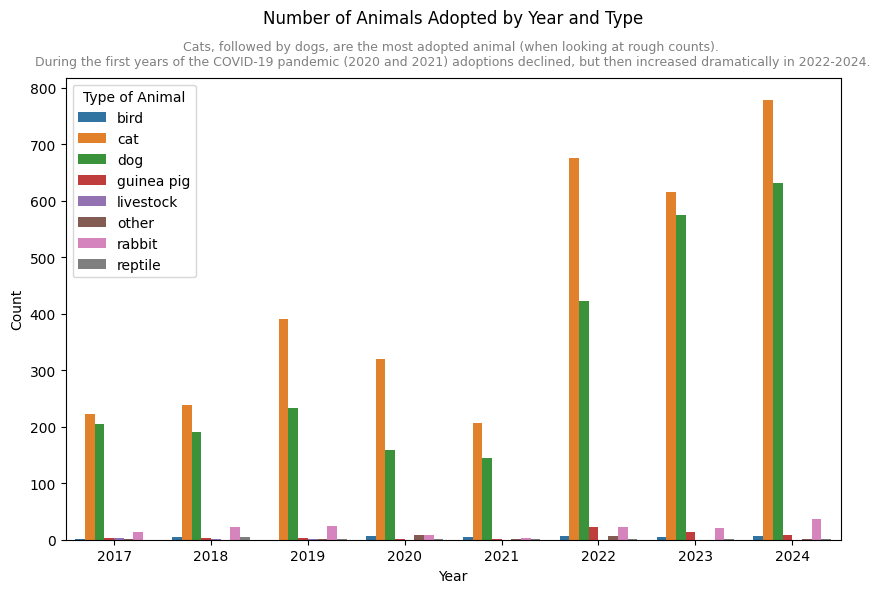

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='year', y='count', hue='animal_type')

# Customize plot
plt.title('Number of Animals Adopted by Year and Type', y=1.1)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type of Animal')
plt.text(0.5, 1.02, 'Cats, followed by dogs, are the most adopted animal (when looking at rough counts). \nDuring the first years of the COVID-19 pandemic (2020 and 2021) adoptions declined, but then increased dramatically in 2022-2024.', 
         ha='center', va='bottom', transform=plt.gca().transAxes, fontsize=9, color='grey')

# Show the plot
#plt.tight_layout()
plt.show()